In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [54]:
spotify = pd.read_csv('spotify_history.csv')
spotify_data = pd.read_csv('spotify_data_dictionary Description.csv')

In [55]:
spotify

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [56]:
spotify_data

,Field,Description
0,spotify_track_uri,Spotify URI that uniquely identifies each trac...
1,ts,Timestamp indicating when the track stopped pl...
2,platform,Platform used when streaming the track
3,ms_played,Number of milliseconds the stream was played
4,track_name,Name of the track
5,artist_name,Name of the artist
6,album_name,Name of the album
7,reason_start,Why the track started
8,reason_end,Why the track ended
9,shuffle,TRUE or FALSE depending on if shuffle mode was...


In [57]:
spotify['ts'] = pd.to_datetime(spotify['ts'])

In [58]:
#covert ms_played to numeric a minutes
spotify['ms_played'] = pd.to_numeric(spotify['ms_played'], errors='coerce')
spotify['ms_played'] = spotify['ms_played'] / 60000  # Convert milliseconds to minutes

In [59]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  float64       
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149717 non-null  object        
 8   reason_end         149743 non-null  object        
 9   shuffle            149860 non-null  bool          
 10  skipped            149860 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(7)
memory usage: 10.6+ MB


In [60]:
#most platfrom used
spotify['platform'].value_counts()

platform
android           139821
cast to device      3898
iOS                 3049
windows             1691
mac                 1176
web player           225
Name: count, dtype: int64

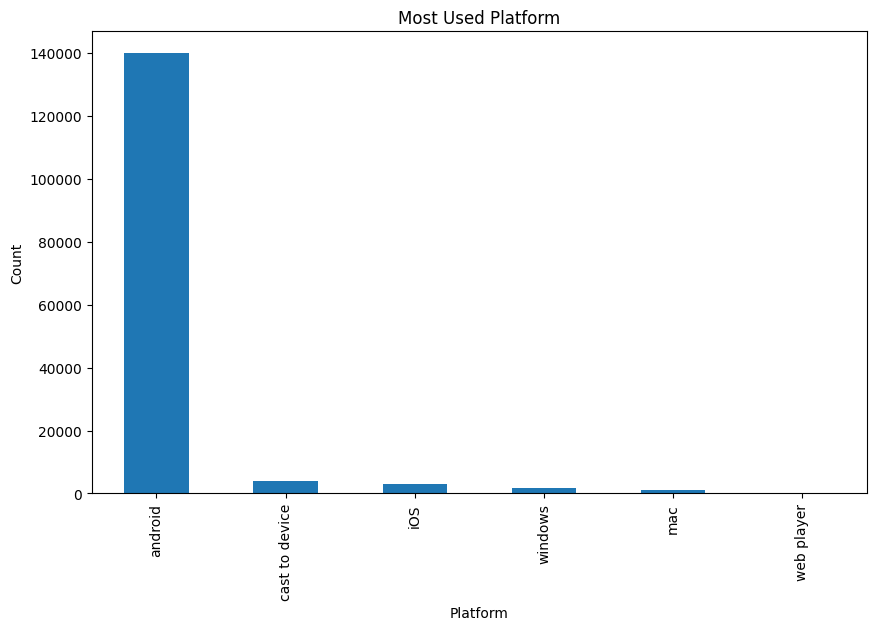

In [61]:
spotify['platform'].value_counts().plot(kind='bar', title='Most Used Platform', figsize=(10, 6))
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

In [62]:
spotify['artist_name'].value_counts().head(10)

artist_name
The Beatles           13621
The Killers            6878
John Mayer             4855
Bob Dylan              3814
Paul McCartney         2697
Led Zeppelin           2482
Johnny Cash            2478
The Rolling Stones     2390
Radiohead              2305
The Black Keys         2231
Name: count, dtype: int64

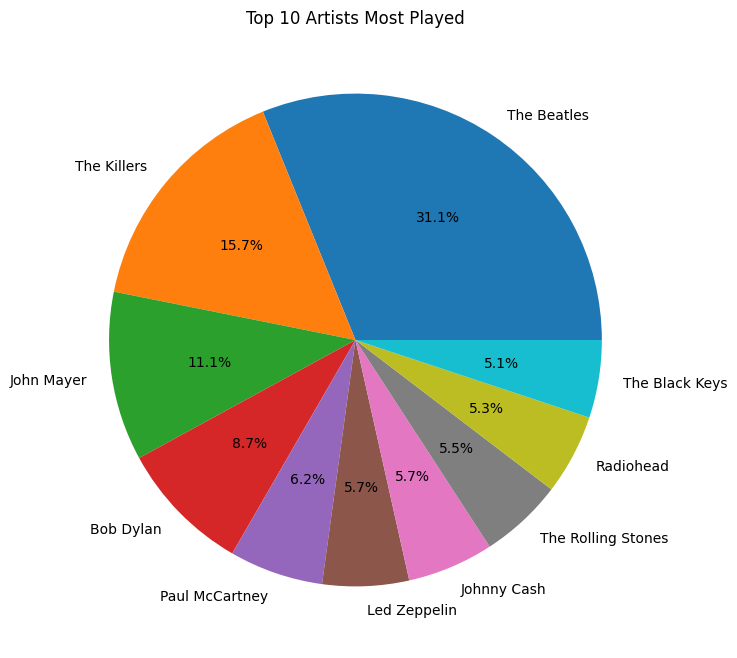

In [63]:
## artist most played for plataform pie chart
spotify['artist_name'].value_counts().head(10).plot(kind='pie', title='Top 10 Artists Most Played', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()

In [64]:
## mean time played by artist
mean_played_artist = spotify.groupby('artist_name')['ms_played'].mean().sort_values(ascending=False)
mean_played_artist.head(10)

artist_name
Cory Weeds                11.029550
Dan Lacksman              10.751342
Dave Matthews Band        10.698767
Mike Oldfield             10.332519
Brad Mehldau              10.008883
George Martin              9.493550
Azymuth                    9.469667
Mudcrutch                  9.468217
Robe                       9.177100
Les Ya Toupas Du Zaire     8.943100
Name: ms_played, dtype: float64

In [65]:
# 2. Convertir variables categóricas a numéricas
le_start = LabelEncoder()
le_end = LabelEncoder()

df['reason_start_encoded'] = le_start.fit_transform(df['reason_start'])
df['reason_end_encoded'] = le_end.fit_transform(df['reason_end'])
df['shuffle_encoded'] = df['shuffle'].map({'TRUE': 1, 'FALSE': 0})

# 3. Variable objetivo
df['skipped_encoded'] = df['skipped'].map({'TRUE': 1, 'FALSE': 0})

# 4. Seleccionar variables predictoras y objetivo
X = df[['reason_start_encoded', 'reason_end_encoded', 'shuffle_encoded']]
y = df['skipped_encoded']

# 5. Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Crear y entrenar modelo
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# 7. Hacer predicciones
y_pred = modelo.predict(X_test)

# 8. Reporte
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha